In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from ComplexCells import detect_square, detect_triangle, get_squares_centroid, get_triangles_centroid, classify

In [2]:
img_tri = cv2.imread('triangle.jpg')
img_sq = cv2.imread('square.jpg')
img_bl = cv2.imread('blank.jpg')
img_mul = cv2.imread('mul.jpg')

In [3]:
shape = ['square', 'triangle', 'else']

print('|====== TEST Classify ======|')
print('Test Square: ', shape[classify(img_sq)])
print('Test Triangle: ', shape[classify(img_tri)])
print('Test Else: ', shape[classify(img_bl)])

|====== TEST Classify ======|
Test Square:  square
Test Triangle:  triangle
Test Else:  else


|====== TEST Location in Multiple Objects ======|
No of Squares (shown with black dots):  35
No of Triangles (shown with white dots):  109


True

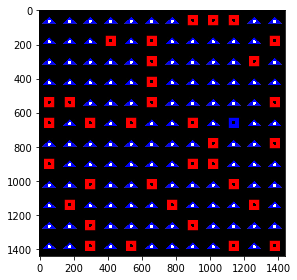

In [4]:
print('|====== TEST Location in Multiple Objects ======|')
bimg = np.copy(img_mul)

centroid = get_squares_centroid(img_mul)
print("No of Squares (shown with black dots): ", centroid.shape[0])
centroid = np.asarray(centroid)
for i in range(centroid.shape[0]):
    cen = centroid[i]
    bimg = cv2.circle(bimg,(np.int(cen[0]), np.int(cen[1])), 10, (0,0,0), -1)
    
centroid = get_triangles_centroid(img_mul)
print("No of Triangles (shown with white dots): ", centroid.shape[0])
centroid = np.asarray(centroid)
for i in range(centroid.shape[0]):
    cen = centroid[i]
    bimg = cv2.circle(bimg,(np.int(cen[0]), np.int(cen[1])), 10, (255,255,255), -1)
    
io.imshow(np.uint8(bimg))
cv2.imwrite('multiple_detection_output.jpg', bimg)